# Code to use the fastASD algorithm from Aoi & Pillow, 2017

In [1]:
cd ~/Documents/Current-Projects/fastASD/demos

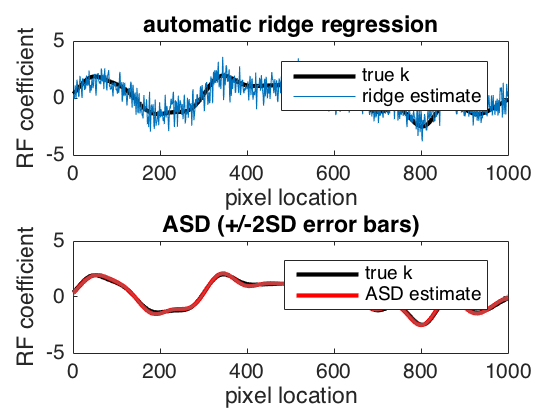

...Running ridge regression with fixed-point updates...
Finished autoRidgeRegression in #27 steps


...Running ASD...

compLSsuffstats_fourier:
 # filter freqs per stimulus dim: 97 
 Total # Fourier coeffs represented: 97

isotropic nd-ASD: terminated with rank of Cprior = 55
Elapsed time is 0.711696 seconds.

Hyerparam estimates (+/-1SD)
----------------------------
     l:  50.0   44.6 (+/-3.3)
   rho:   2.0    1.4 (+/-0.5)
nsevar: 100.0   99.5 (+/-6.5)

R-squared:
----------
  Ridge =  0.67
    ASD =  1.00


In [2]:
test_fastASD_1D

## Use on my own simulated data, 1D

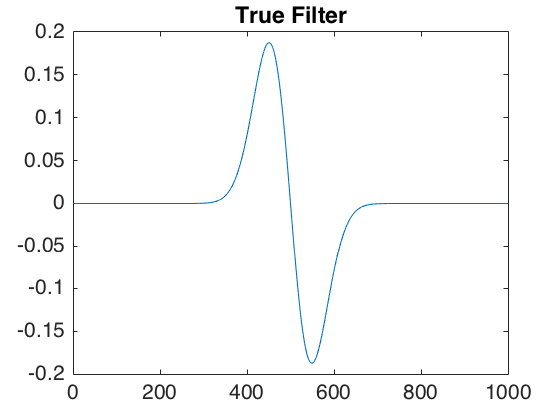

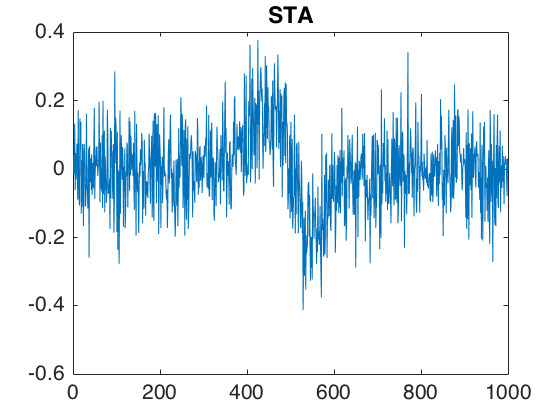

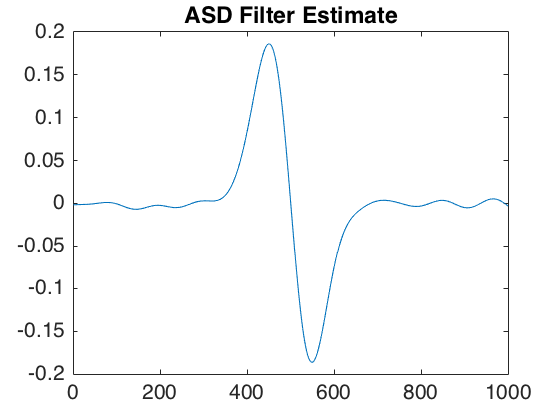

compLSsuffstats_fourier:
 # filter freqs per stimulus dim: 241 
 Total # Fourier coeffs represented: 241

isotropic nd-ASD: terminated with rank of Cprior = 45

R-squared for ASD: 1.00
R-squared for STA: 0.55
R-squared for MLE: 0.01


asdstats = 

          len: 54.8832
          rho: 0.0054
       nsevar: 0.1638
            H: [3x3 double]
           ci: [3x1 double]
     neglogEv: 319.6653
    Lpostdiag: [1000x1 double]


In [36]:
N = 500;DIM = 1000;
whiteData = normrnd(0,1,[N,DIM]);

filter = sin(2*pi*0.001*(1:DIM)).*exp(-((1:DIM)-N).^2/(2*50*50));

filterOutput = zeros(N,1);
for ii=1:N
    filterOutput(ii) = sum(whiteData(ii,:).*filter); 
end

filterOutput = filterOutput+normrnd(0,std(filterOutput)/5,[N,1]);

% calculate maximum likelihood estimate
estFilter = whiteData\filterOutput;

% calculate ML with expected value of covariance (basically, STA)
estFilter2 = (1/(var(whiteData(:))*N)).*whiteData'*filterOutput;

% calculate estimate using ASD
DIM = 1000;minL = 10;
[k_asd,asdstats] = fastASD(whiteData,filterOutput,DIM,minL);

figure;plot(k_asd);title('ASD Filter Estimate');
figure;plot(estFilter2);title('STA');
figure;plot(filter);title('True Filter');

[r,~] = corrcoef(k_asd,filter);
[r2,~] = corrcoef(estFilter2,filter);
[r3,~] = corrcoef(estFilter,filter);

fprintf('\nR-squared for ASD: %3.2f\n',r(1,2).*r(1,2));
fprintf('R-squared for STA: %3.2f\n',r2(1,2).*r(1,2));
fprintf('R-squared for MLE: %3.2f\n\n',r3(1,2).*r3(1,2));

asdstats

The maximum likelihood estimate and the STA are corrupted by noise, but ASD discovers the true filter almost perfectly.

## Simulated Data, 2D Spatial Filter with White Noise Stimuli

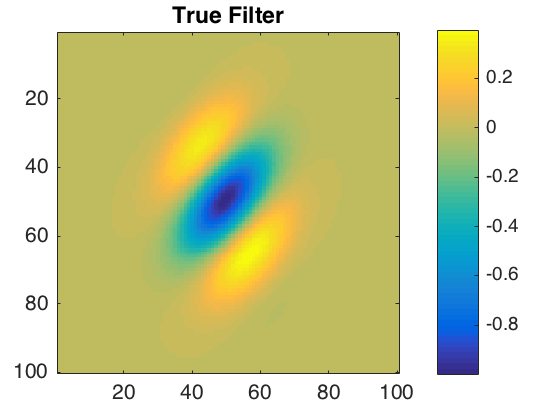

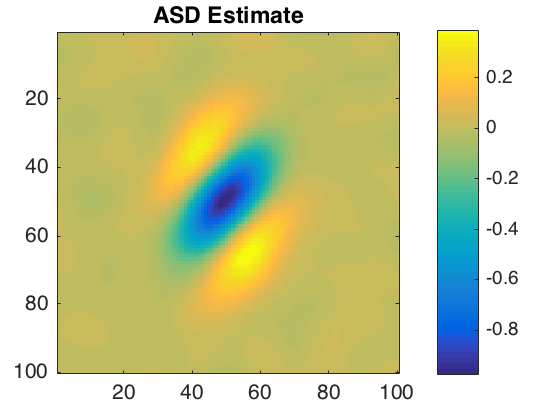

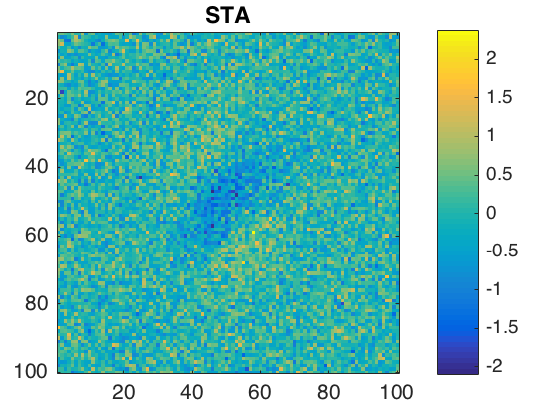

compLSsuffstats_fourier:
 # filter freqs per stimulus dim: 125  125 
 Total # Fourier coeffs represented: 15625

isotropic nd-ASD: terminated with rank of Cprior = 517
Elapsed time is 22.843988 seconds.


In [32]:
N = 1000;DIM = [100,100];

whiteData = normrnd(0,1,[N,DIM(1)*DIM(2)]);

[X,Y] = meshgrid(1:DIM(1),1:DIM(2));

orientVec = cos(pi/4-pi/2).*X-sin(pi/4-pi/2).*Y;
filter = exp(-(X-50).*(X-50)/(2*10*10)-(Y-50).*(Y-50)/(2*15*15)).*sin(2*pi*orientVec/40);

filterOutput = zeros(N,1);
for ii=1:N
    temp = reshape(whiteData(ii,:),DIM);
    filterOutput(ii) = sum(sum(temp.*filter)); 
end

filterOutput = filterOutput+normrnd(0,std(filterOutput)/5,[N,1]);

minLen = 1;
tic;
[k_asd,asdstats] = fastASD(whiteData,filterOutput,DIM,minLen);
toc;

estFilter = (1/(var(whiteData(:))*N)).*whiteData'*filterOutput;

figure;imagesc(reshape(estFilter,DIM));title('STA');colorbar;
figure;imagesc(reshape(k_asd,DIM));title('ASD Estimate');colorbar;
figure;imagesc(filter);title('True Filter');colorbar;

## Simulated Data, 2D Spatial Filter with Pink Noise Stimuli

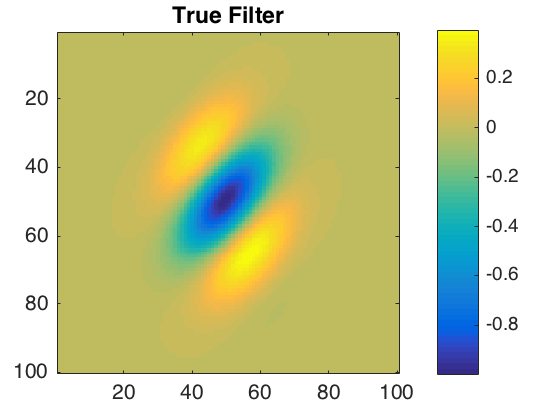

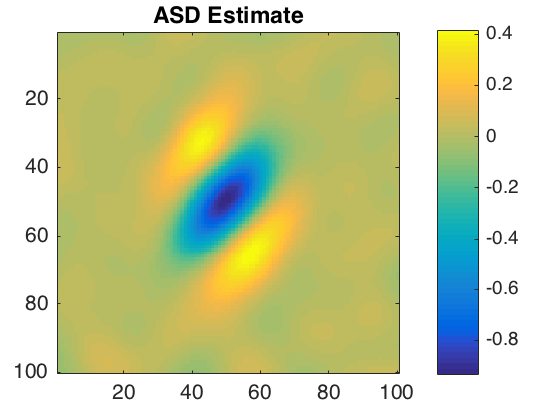

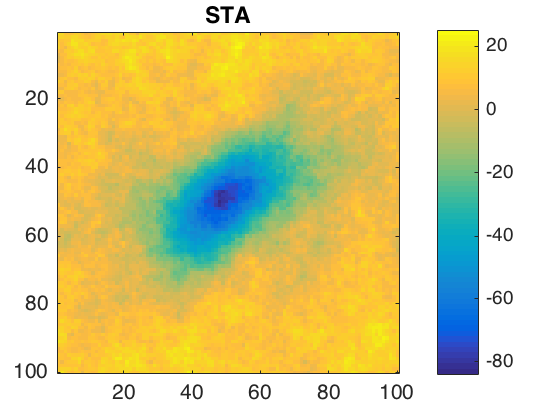

compLSsuffstats_fourier:
 # filter freqs per stimulus dim: 125  125 
 Total # Fourier coeffs represented: 15625

isotropic nd-ASD: terminated with rank of Cprior = 561
Elapsed time is 27.066868 seconds.


In [1]:
N = 1000;DIM = [100,100];

pinkData = zeros(N,DIM(1)*DIM(2));
whitenedData = zeros(N,DIM(1)*DIM(2));

[X,Y] = meshgrid(1:DIM(1),1:DIM(2));

orientVec = cos(pi/4-pi/2).*X-sin(pi/4-pi/2).*Y;
filter = exp(-(X-50).*(X-50)/(2*10*10)-(Y-50).*(Y-50)/(2*15*15)).*sin(2*pi*orientVec/40);

filterOutput = zeros(N,1);
for ii=1:N
    [temp1,temp2] = spatialPattern(DIM,-2);
    pinkData(ii,:) = temp1(:);
    whitenedData(ii,:) = temp2(:);
    filterOutput(ii) = sum(sum(temp1.*filter)); 
end

filterOutput = filterOutput+normrnd(0,std(filterOutput)/5,[N,1]);

pinkData = pinkData-mean(pinkData(:));
whitenedData = whitenedData-mean(whitenedData(:));
minLen = 1;
tic;
[k_asd,asdstats] = fastASD(pinkData,filterOutput,DIM,minLen);
toc;

% [k_asd2,~] = fastASD(whitenedData,filterOutput,DIM,minLen);

estFilter = (1/(var(pinkData(:))*N)).*pinkData'*filterOutput;

figure;imagesc(reshape(estFilter,DIM));title('STA');colorbar;
% figure;imagesc(reshape(k_asd2,DIM));title('ASD Estimate with Pre-Whitened Data');colorbar;
figure;imagesc(reshape(k_asd,DIM));title('ASD Estimate');colorbar;
figure;imagesc(filter);title('True Filter');colorbar;

# Real Single-Unit Data, Recorded in the Gavornik Lab with Pink Noise Stimuli

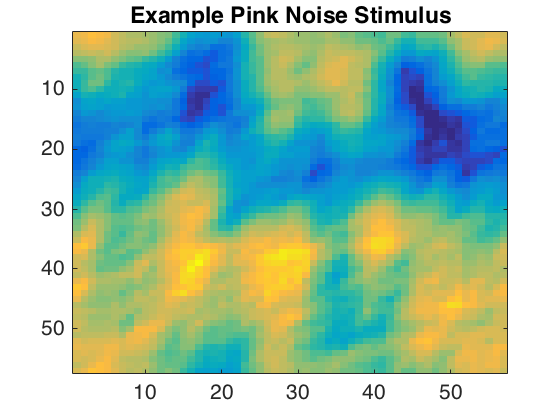

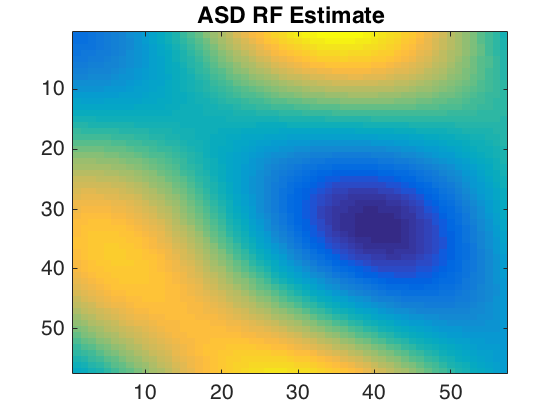

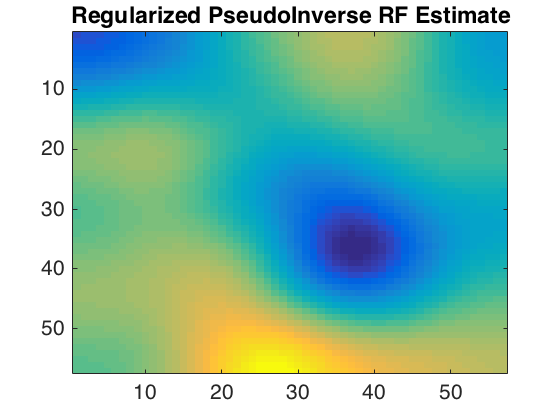

compLSsuffstats_fourier:
 # filter freqs per stimulus dim: 72  72 
 Total # Fourier coeffs represented: 5184

isotropic nd-ASD: terminated with rank of Cprior = 9


In [21]:
cd ~/CloudStation/ByronExp/NoiseRetino/

files = dir('NoiseDatapink*-mounsort.mat');
NoiseType = 'pink';

    filename = files(3).name;
    index1 = regexp(filename,'_');
    index2 = regexp(filename,'-');
    AnimalName = filename(index1+1:index2-1);
    Date = filename(index1-8:index1-1);

    StimulusFileName = sprintf('NoiseStim%s%s_%s.mat',NoiseType,Date,AnimalName);
    load(filename,'nunits1','allts','adfreqs','allad','svStrobed','tsevs','totalTime','totalUnits','Chans')
    load(StimulusFileName)
    
    resultsFileName = sprintf('NoiseData%s%s_%s-PILNPResults.mat',NoiseType,Date,AnimalName);
    load(resultsFileName,'F');
    
    if totalUnits > 0
        DIM = zeros(1,2);
        if size(effectivePixels,2) == 1
            DIM(1) = sqrt(effectivePixels);
            DIM(2) = sqrt(effectivePixels);
        elseif size(effectivePixels,2) == 2
            DIM(1) = effectivePixels(2);
            DIM(2) = effectivePixels(1);
        end
        
        strobeStart = 33;
        strobeData = tsevs{1,strobeStart};

        if length(strobeData) ~= numStimuli && length(unique(svStrobed)) == 1
            strobeData = strobeData(1:2:end);
        elseif length(unique(svStrobed)) == 3
            strobeData = strobeData(svStrobed==1);
        end
        
        timeMultiplier = 1000;
        totalMillisecs = round(totalTime*timeMultiplier);

        stimTimes = round(strobeData.*timeMultiplier);

        pointProcessSpikes = zeros(totalMillisecs,totalUnits);

        for ii=1:totalUnits
           spikeTimes = max(1,round(allts{ii}.*timeMultiplier));
           for jj=1:length(spikeTimes)
              pointProcessSpikes(spikeTimes(jj),ii) = 1;
           end
        end

        reducedSpikeCount = zeros(totalUnits,numStimuli,1*timeMultiplier);
        for ii=1:totalUnits
            for jj=1:numStimuli
                timeInds = stimTimes(jj):stimTimes(jj)+1*timeMultiplier-1;
                reducedSpikeCount(ii,jj,:) = pointProcessSpikes(timeInds,ii)';
            end
        end
        
        S = double(S);S = S-mean(S(:));
        for zz=1:totalUnits
            spikeTrain = squeeze(reducedSpikeCount(zz,:,:));
            spikeTrain = sum(spikeTrain(:,50:150),2);
            minLen = 1;
            [k_asd,asdstats] = fastASD(S,spikeTrain,DIM,minLen);
            figure;imagesc(reshape(F{zz},DIM));
            title('Regularized PseudoInverse RF Estimate');
            figure;imagesc(reshape(k_asd,DIM));
            title('ASD RF Estimate');
            figure;imagesc(reshape(S(17,:),DIM));title('Example Pink Noise Stimulus');
        end
    end


## Simulate ASD With Natural Images and Restructured Natural Images

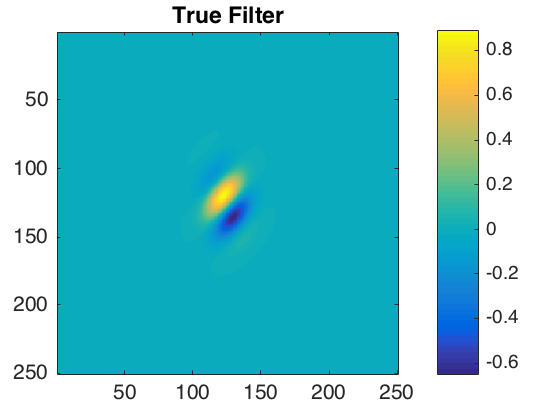

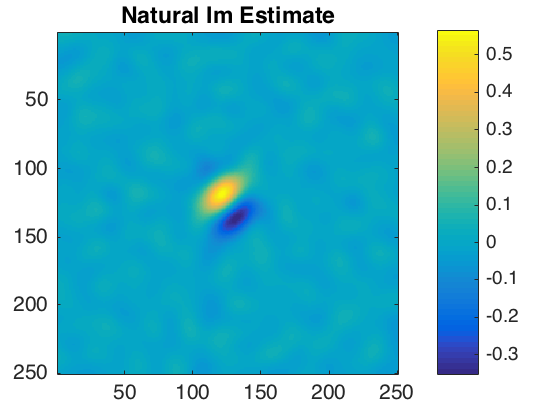

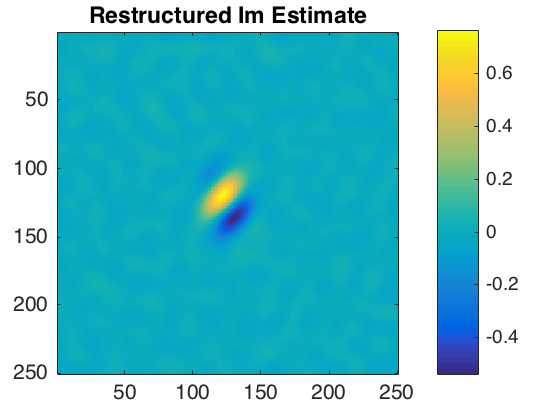

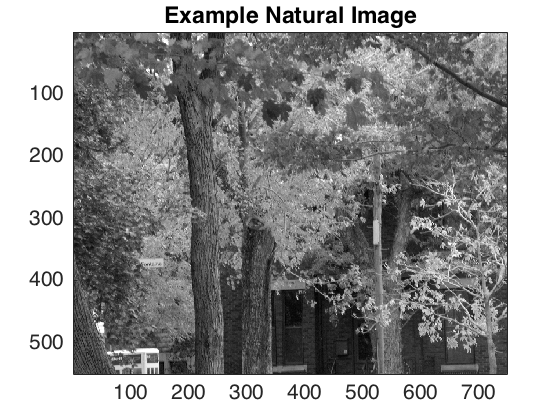

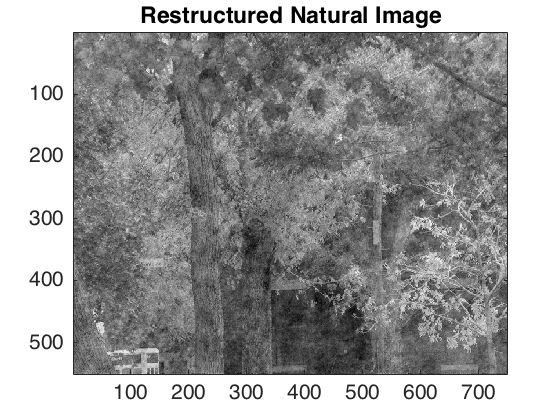

compLSsuffstats_fourier:
 # filter freqs per stimulus dim: 121  121 
 Total # Fourier coeffs represented: 14641

isotropic nd-ASD: terminated with rank of Cprior = 4905
[Warning: Matrix is close to singular or badly scaled. Results may be
inaccurate. RCOND =  7.736640e-18.] 
[> In fastASD (line 112)
  In pymat_eval (line 31)
  In matlabserver (line 24)] 
Elapsed time is 205.997250 seconds.

compLSsuffstats_fourier:
 # filter freqs per stimulus dim: 121  121 
 Total # Fourier coeffs represented: 14641

isotropic nd-ASD: terminated with rank of Cprior = 4485


In [27]:
cd ~/CloudStation/ByronExp/RestructuredNaturalImages/

load('NaturalImages.mat');load('ResNaturalImages.mat');

figure;imagesc(resIms(:,:,1));colormap('gray');title('Restructured Natural Image');
figure;imagesc(allIms(:,:,1));colormap('gray');title('Example Natural Image');

allIms = allIms-mean(allIms(:));
resIms = resIms-mean(resIms(:));

N = size(allIms,3);DIM = [250,250];

naturalData = zeros(N,DIM(1)*DIM(2));
resNatData = zeros(N,DIM(1)*DIM(2));

[X,Y] = meshgrid(1:DIM(2),1:DIM(1));

orientVec = cos(pi/4-pi/2).*X-sin(pi/4-pi/2).*Y;
filter = exp(-(X-125).*(X-125)/(2*10*10)-(Y-125).*(Y-125)/(2*15*15)).*sin(2*pi*orientVec/40);

filterNatOutput = zeros(N,1);
filterResNatOutput = zeros(N,1);
for ii=1:N
    temp1 = double(allIms(1:DIM(1),1:DIM(2),ii));
    temp2 = double(resIms(1:DIM(1),1:DIM(2),ii));
    naturalData(ii,:) = temp1(:);
    resNatData(ii,:) = temp2(:);
    filterNatOutput(ii) = sum(sum(temp1.*filter)); 
    filterResNatOutput(ii) = sum(sum(temp2.*filter));
end

filterNatOutput = filterNatOutput+normrnd(0,std(filterOutput)/5,[N,1]);
filterResNatOutput = filterResNatOutput+normrnd(0,std(filterOutput)/5,[N,1]);
filterNatOutput = filterNatOutput-mean(filterNatOutput);
filterResNatOutput = filterResNatOutput-mean(filterResNatOutput);

minLen = 5;
tic;
[k_asdnat,~] = fastASD(naturalData,filterNatOutput,DIM,minLen);
toc;

[k_asdresnat,~] = fastASD(resNatData,filterResNatOutput,DIM,minLen);

figure;imagesc(reshape(k_asdresnat,DIM));title('Restructured Im Estimate');colorbar;
figure;imagesc(reshape(k_asdnat,DIM));title('Natural Im Estimate');colorbar;
figure;imagesc(filter);title('True Filter');colorbar;

In [31]:
natError = sqrt(mean(mean(abs(reshape(k_asdnat,DIM)-filter).^2)));
resNatError = sqrt(mean(mean(abs(reshape(k_asdresnat,DIM)-filter).^2)));

fprintf('RMSE for Res Natural Images: %3.3f\n',resNatError);
fprintf('RMSE for Natural Images: %3.3f\n',natError);

RMSE for Res Natural Images: 0.019
RMSE for Natural Images: 0.033


The restructured natural images actually yield a better fit to the filter, in terms of root mean-squared error. Looking at the filter estimates, you see a slight bias in the orientation of the Gabor when estimated using the natural images. This bias is corrected, to the eye, when using the restructured images.